### The libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

### Raeading Data

In [3]:
Data= pd.read_csv("/home/learner/Desktop/Data Anlaysis/ImmoEliza-Analysis/Hussain - Cleaned_Data.csv")

In [124]:
Data

,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
Id,,,,,,,,,,,,,,,,,,,
20316087,Ertvelde,House,house,Private,329000,2,0,1,0,0,1,0,0,0,0,225,Good,3,0
20316069,Hornu,House,house,Private,180000,3,138,0,0,0,1,1,1,1,140,110,As new,2,1
20316048,Beersel,House,house,Private,369000,6,230,0,0,0,1,0,0,0,230,1660,To be done up,3,1
20316039,Geraardsbergen,House,house,Private,145000,2,80,1,0,0,0,0,0,0,80,30,Good,2,0
20316038,Geraardsbergen,House,house,Private,269000,3,155,1,0,0,1,20,1,170,345,250,Good,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892306,Ere,Other,offices,Private,263900,0,228,0,0,0,0,0,0,0,228,0,Good,0,0
7810321,Drogenbos,Other,office-block,Private,1112000,0,556,0,0,0,0,0,0,0,556,556,Not Known,0,0
7600835,Mons,Other,outdoor-parking-space,Private,20000,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0


In [5]:
Data.describe(include=['object', 'category'])

,Locality,Type,SubType,Sale_Type,State
count,13707,13707,13707,13707,13707
unique,838,3,35,1,7
top,Knokke,Apartment,apartment,Private,Good
freq,413,5991,4676,13707,4339


In [6]:
Data.Price.describe().astype(int)

count         13707
mean         551515
std        12837631
min               0
25%          225000
50%          325000
75%          479000
max      1500001600
Name: Price, dtype: int64

In [7]:
Data.drop_duplicates(inplace=True)

In [14]:
Data

,Id,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
0,20316087,Ertvelde,House,house,Private,329000,2,0,True,False,False,True,0,False,0,0,225,Good,3,False
1,20316069,Hornu,House,house,Private,180000,3,138,False,False,False,True,1,True,1,140,110,As new,2,True
2,20316048,Beersel,House,house,Private,369000,6,230,False,False,False,True,0,False,0,230,1660,To be done up,3,True
3,20316039,Geraardsbergen,House,house,Private,145000,2,80,True,False,False,False,0,False,0,80,30,Good,2,False
4,20316038,Geraardsbergen,House,house,Private,269000,3,155,True,False,False,True,20,True,170,345,250,Good,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13702,7892306,Ere,Other,offices,Private,263900,0,228,False,False,False,False,0,False,0,228,0,Good,0,False
13703,7810321,Drogenbos,Other,office-block,Private,1112000,0,556,False,False,False,False,0,False,0,556,556,Not Known,0,False
13704,7600835,Mons,Other,outdoor-parking-space,Private,20000,0,0,False,False,False,False,0,False,0,0,0,Not Known,0,False
13705,7066466,Duisburg,Other,lock-up-garage,Private,30000,0,0,False,False,False,False,0,False,0,0,0,Not Known,0,False


In [22]:
Data=Data.set_index(Data.Id).drop("Id",axis=1)

In [23]:
Data

,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
Id,,,,,,,,,,,,,,,,,,,
20316087,Ertvelde,House,house,Private,329000,2,0,True,False,False,True,0,False,0,0,225,Good,3,False
20316069,Hornu,House,house,Private,180000,3,138,False,False,False,True,1,True,1,140,110,As new,2,True
20316048,Beersel,House,house,Private,369000,6,230,False,False,False,True,0,False,0,230,1660,To be done up,3,True
20316039,Geraardsbergen,House,house,Private,145000,2,80,True,False,False,False,0,False,0,80,30,Good,2,False
20316038,Geraardsbergen,House,house,Private,269000,3,155,True,False,False,True,20,True,170,345,250,Good,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892306,Ere,Other,offices,Private,263900,0,228,False,False,False,False,0,False,0,228,0,Good,0,False
7810321,Drogenbos,Other,office-block,Private,1112000,0,556,False,False,False,False,0,False,0,556,556,Not Known,0,False
7600835,Mons,Other,outdoor-parking-space,Private,20000,0,0,False,False,False,False,0,False,0,0,0,Not Known,0,False


### Data Anlysis

In [44]:
Data .Price.describe().astype(int)

count         13615
mean         552726
std        12880903
min               0
25%          225000
50%          325000
75%          480000
max      1500001600
Name: Price, dtype: int64

How many rows and columns

In [24]:
Data.shape

(13615, 19)

correlation between variables

In [29]:

# convert bolean to zeros and one to calculate correlation
Data = Data.applymap(lambda x: int(x) if isinstance(x, bool) else x)
Data

/tmp/ipykernel_30969/3617720521.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Data = Data.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
Id,,,,,,,,,,,,,,,,,,,
20316087,Ertvelde,House,house,Private,329000,2,0,1,0,0,1,0,0,0,0,225,Good,3,0
20316069,Hornu,House,house,Private,180000,3,138,0,0,0,1,1,1,1,140,110,As new,2,1
20316048,Beersel,House,house,Private,369000,6,230,0,0,0,1,0,0,0,230,1660,To be done up,3,1
20316039,Geraardsbergen,House,house,Private,145000,2,80,1,0,0,0,0,0,0,80,30,Good,2,0
20316038,Geraardsbergen,House,house,Private,269000,3,155,1,0,0,1,20,1,170,345,250,Good,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892306,Ere,Other,offices,Private,263900,0,228,0,0,0,0,0,0,0,228,0,Good,0,0
7810321,Drogenbos,Other,office-block,Private,1112000,0,556,0,0,0,0,0,0,0,556,556,Not Known,0,0
7600835,Mons,Other,outdoor-parking-space,Private,20000,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0


In [47]:
numerical_data = Data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix.Price

Price                  1.000000
Bedrooms               0.013827
Living_Area            0.027755
Is_Equiped_Kitchen    -0.005673
Is_Furnished           0.003684
Is_Open_Fire           0.004029
Terrace                0.010284
Terrace_Area           0.001424
Garden                -0.001989
Garden_Area            0.002830
Land_Surface           0.009103
Surface of the plot    0.010070
Facades                0.020382
Swim_pool             -0.000654
Name: Price, dtype: float64

<AxesSubplot: >

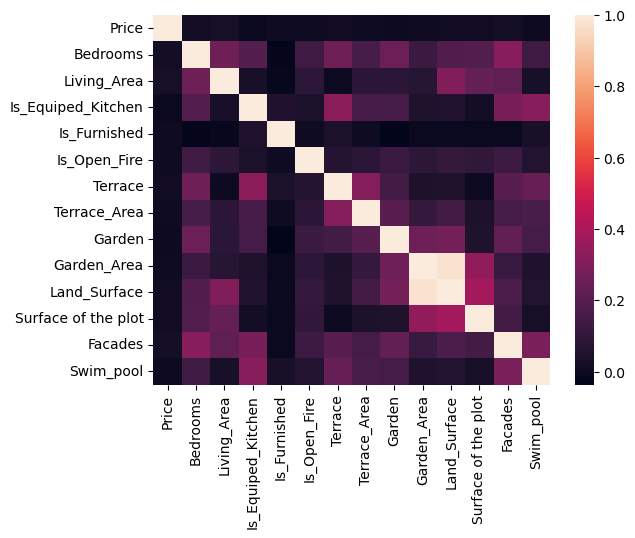

In [38]:
sns.heatmap(correlation_matrix)

No obvious Resuslt  since we have outlires!


- Which variables have the greatest influence on the price?
   #### Living_area 
- Which variables have the least influence on the price?
   #### Swim_pool

### But actually that is shit in case we have outlires !

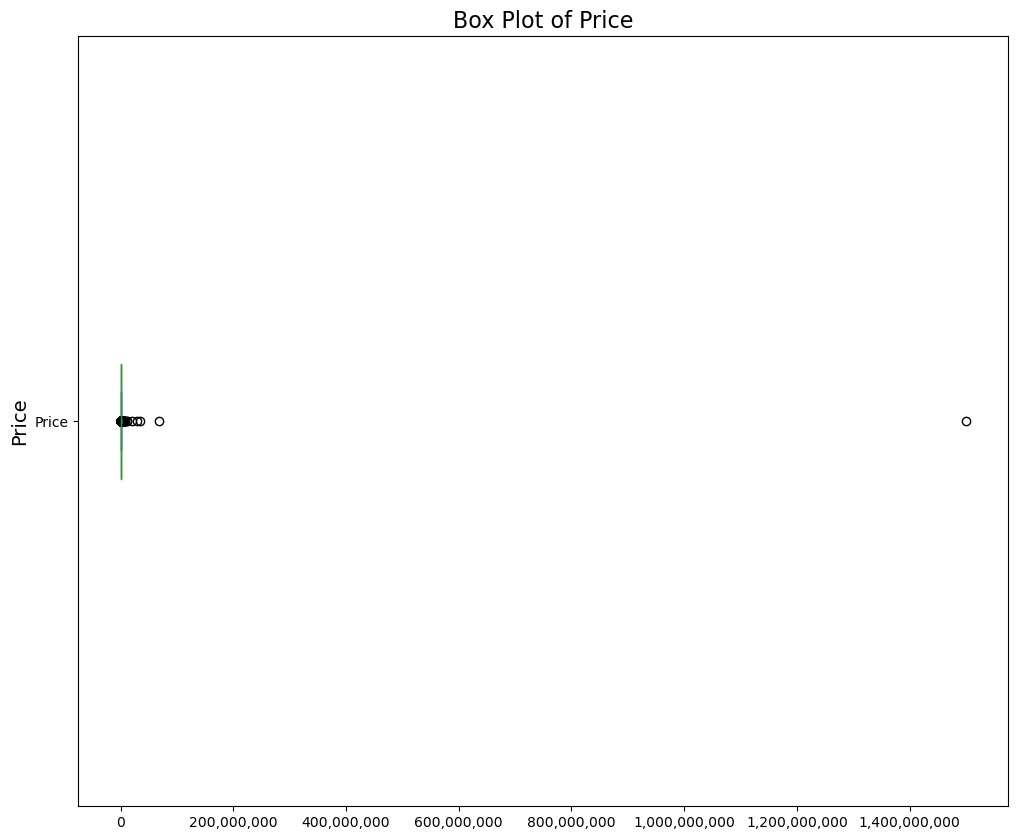

In [75]:
Data.Price.describe().astype(int)
plt.figure(figsize=(12,10))
Data.Price.plot(kind='box', patch_artist=True,vert=False, boxprops=dict(facecolor='skyblue', color='black'))
# Customize the plot
plt.title('Box Plot of Price', fontsize=16)
plt.ylabel('Price', fontsize=14)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1:,.0f}'))

plt.show()

### So we  should take of thew outtlires !


In [81]:
Outliers = Data[(Data.Price > 1000000) | (Data.Price < 30000)]
Outliers


,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
Id,,,,,,,,,,,,,,,,,,,
20315996,Brussel,House,house,Private,1280000,5,518,1,0,1,1,30,1,285,833,0,Good,2,1
20315995,Elsene,House,house,Private,1280000,5,518,1,0,1,1,30,1,285,833,0,Good,2,1
20315994,Watermaal-bosvoorde,House,house,Private,1280000,5,518,1,0,1,1,30,1,285,833,0,Good,2,1
20315862,Elsene,Apartment,apartment,Private,1250000,2,153,1,0,0,1,0,0,0,153,0,As new,3,0
20315515,Bergilers,Apartment,apartment-block,Private,1295000,3,1363,1,0,0,1,0,0,0,1363,4528,Good,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518463,Mons,Other,outdoor-parking-space,Private,7500,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0
8518451,Monstreux,Other,outdoor-parking-space,Private,6500,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0
7810321,Drogenbos,Other,office-block,Private,1112000,0,556,0,0,0,0,0,0,0,556,556,Not Known,0,0


In [111]:
Data_cleaned = Data[~((Data.Price > 1000000) | (Data.Price < 30000))]

In [112]:
Data_cleaned

,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool
Id,,,,,,,,,,,,,,,,,,,
20316087,Ertvelde,House,house,Private,329000,2,0,1,0,0,1,0,0,0,0,225,Good,3,0
20316069,Hornu,House,house,Private,180000,3,138,0,0,0,1,1,1,1,140,110,As new,2,1
20316048,Beersel,House,house,Private,369000,6,230,0,0,0,1,0,0,0,230,1660,To be done up,3,1
20316039,Geraardsbergen,House,house,Private,145000,2,80,1,0,0,0,0,0,0,80,30,Good,2,0
20316038,Geraardsbergen,House,house,Private,269000,3,155,1,0,0,1,20,1,170,345,250,Good,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031851,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0
8031838,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,0,0,0,0,0,0,0,Not Known,0,0
7961536,Aarsele,Apartment,apartment,Private,305000,2,70,1,0,0,0,0,0,0,70,0,Good,0,0


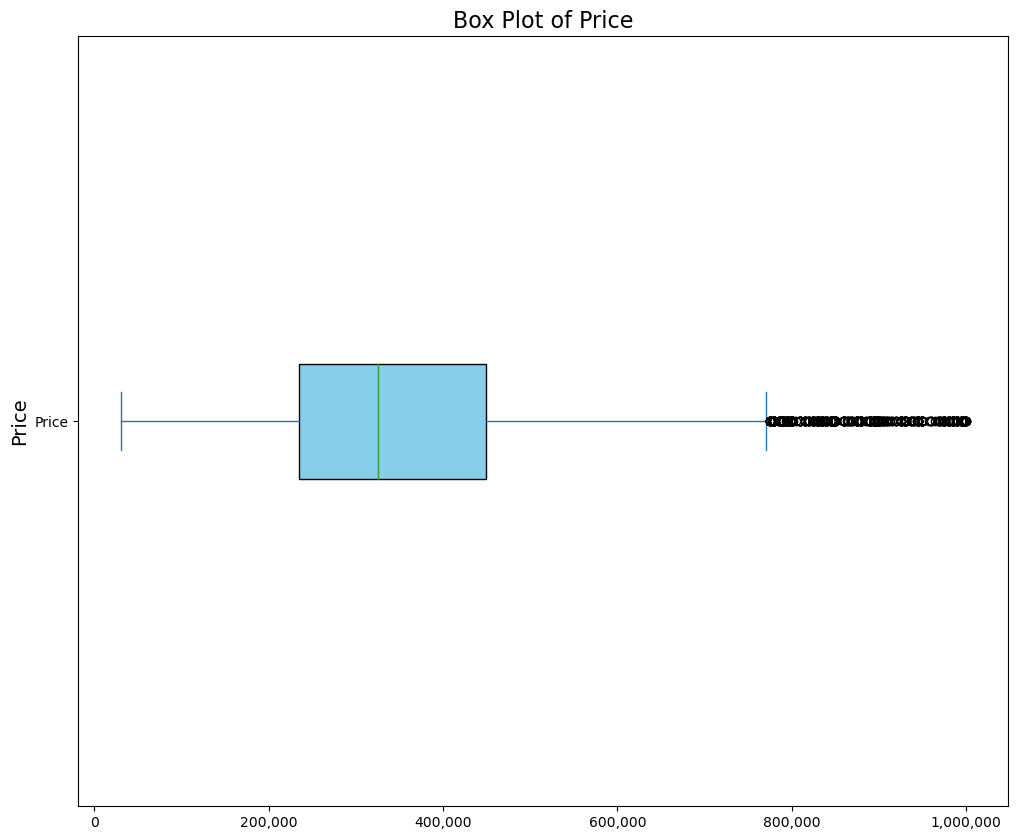

In [113]:
Data_cleaned.Price.describe().astype(int)
plt.figure(figsize=(12,10))
Data_cleaned.Price.plot(kind='box', patch_artist=True,vert=False, boxprops=dict(facecolor='skyblue', color='black'))
# Customize the plot
plt.title('Box Plot of Price', fontsize=16)
plt.ylabel('Price', fontsize=14)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1:,.0f}'))

plt.show()

## Doing  Data Analysis steps again


In [114]:
Data_cleaned.Price.describe().astype(int)

count     12203
mean     361228
std      192578
min       30000
25%      234750
50%      325000
75%      449000
max      999999
Name: Price, dtype: int64

In [115]:
Data_cleaned.shape

(12203, 19)

In [116]:
numerical_data = Data_cleaned.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,Facades,Swim_pool
Price,1.000000,0.359020,0.498811,0.120943,-0.018175,0.089115,0.163864,0.164729,0.073700,0.100079,0.182309,0.172238,0.170368,0.121826
Bedrooms,0.359020,1.000000,0.423782,0.129851,-0.061214,0.112804,0.179585,0.130495,0.228572,0.090148,0.159502,0.170341,0.272773,0.078581
Living_Area,0.498811,0.423782,1.000000,0.055677,-0.064823,0.102175,0.018590,0.101140,0.152029,0.095917,0.255921,0.273352,0.266372,0.014476
Is_Equiped_Kitchen,0.120943,0.129851,0.055677,1.000000,0.035518,0.039955,0.282535,0.138310,0.124524,0.039554,0.052127,0.011977,0.241066,0.297201
Is_Furnished,-0.018175,-0.061214,-0.064823,0.035518,1.000000,-0.007290,0.034555,-0.005420,-0.043501,-0.009387,-0.019615,-0.021659,-0.028264,0.030918
Is_Open_Fire,0.089115,0.112804,0.102175,0.039955,-0.007290,1.000000,0.050428,0.059219,0.112406,0.069715,0.085877,0.053962,0.116455,0.032608
Terrace,0.163864,0.179585,0.018590,0.282535,0.034555,0.050428,1.000000,0.304286,0.116073,0.043860,0.056353,-0.008629,0.145145,0.204061
Terrace_Area,0.164729,0.130495,0.101140,0.138310,-0.005420,0.059219,0.304286,1.000000,0.176098,0.091912,0.141053,0.019412,0.124074,0.144725
Garden,0.073700,0.228572,0.152029,0.124524,-0.043501,0.112406,0.116073,0.176098,1.000000,0.289514,0.310697,0.068953,0.203595,0.127780
Garden_Area,0.100079,0.090148,0.095917,0.039554,-0.009387,0.069715,0.043860,0.091912,0.289514,1.000000,0.986132,0.361633,0.120746,0.039487


<AxesSubplot: >

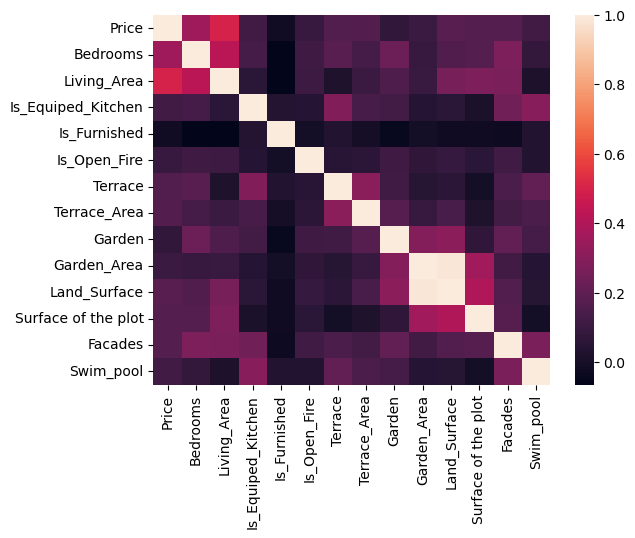

In [117]:
sns.heatmap(correlation_matrix)

Price                  1.000000
Bedrooms               0.359020
Living_Area            0.498811
Is_Equiped_Kitchen     0.120943
Is_Furnished          -0.018175
Is_Open_Fire           0.089115
Terrace                0.163864
Terrace_Area           0.164729
Garden                 0.073700
Garden_Area            0.100079
Land_Surface           0.182309
Surface of the plot    0.172238
Facades                0.170368
Swim_pool              0.121826
Name: Price, dtype: float64


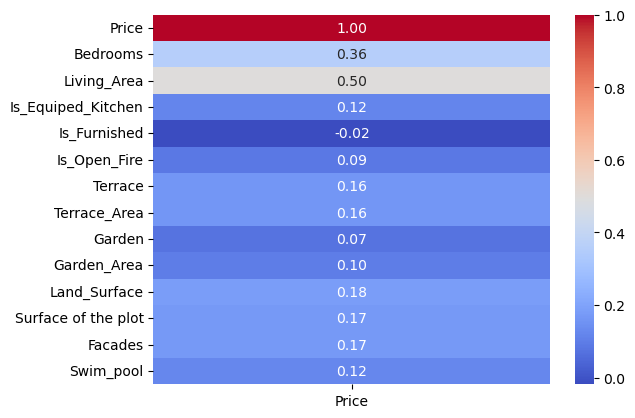

In [118]:
print(correlation_matrix.Price)
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

 ### - Which variables have the greatest influence on the price?
 Living_Area and Bedrooms'number 
 
### - Which variables have the least influence on the price?
Garden , Is_Open_Fire and Is_Furnachered

## - How many qualitative and quantitative variables are there? How would you transform these values into numerical values?




In [119]:
Data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12203 entries, 20316087 to 7066466
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Locality             12203 non-null  object
 1   Type                 12203 non-null  object
 2   SubType              12203 non-null  object
 3   Sale_Type            12203 non-null  object
 4   Price                12203 non-null  int64 
 5   Bedrooms             12203 non-null  int64 
 6   Living_Area          12203 non-null  int64 
 7   Is_Equiped_Kitchen   12203 non-null  int64 
 8   Is_Furnished         12203 non-null  int64 
 9   Is_Open_Fire         12203 non-null  int64 
 10  Terrace              12203 non-null  int64 
 11  Terrace_Area         12203 non-null  int64 
 12  Garden               12203 non-null  int64 
 13  Garden_Area          12203 non-null  int64 
 14  Land_Surface         12203 non-null  int64 
 15  Surface of the plot  12203 non-null  int64 
 16  

## Qualitative (Categorical) Variables:
These variables represent categories or groups:
- Locality (object)
- Type (object)
- SubType (object)
- Sale_Type (object)
- State (object)

## Quantitative (Numeric) Variables:

#### These variables represent measurable quantities:
- Price (int64)
- Bedrooms (int64)
- Living_Area (int64)
- Terrace_Area (int64)
- Garden_Area (int64)
- Land_Surface (int64)
- Surface of the plot (int64)
- Facades (int64)

### Boolean Variables:
These are variables that can take two possible values (True or False), and they are stored as integers (0 or 1):

- Is_Equiped_Kitchen (int64)
- Is_Furnished (int64)
- Is_Open_Fire (int64)
- Terrace (int64)
- Garden (int64)
- Swim_pool (int64)

In [120]:
Data_cleaned.to_csv("Cleaned_Data.CSV")

In [121]:
Data_cleaned=pd.read_csv("Cleaned_Data.CSV")

## Adding Munplicioty and region to our data Data

In [108]:
Regions = pd.read_csv("/home/learner/Desktop/Data Anlaysis/ImmoEliza-Analysis/cities - Copy of cities.csv")
Regions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Locality     2721 non-null   object
 1   Muniplicity  2721 non-null   object
 2   Region       2721 non-null   object
dtypes: object(3)
memory usage: 63.9+ KB


In [122]:
Data_cleaned = Data_cleaned.merge(Regions, on='Locality', how='left')
Data_cleaned

,Id,Locality,Type,SubType,Sale_Type,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,...,Terrace_Area,Garden,Garden_Area,Land_Surface,Surface of the plot,State,Facades,Swim_pool,Muniplicity,Region
0,20316087,Ertvelde,House,house,Private,329000,2,0,1,0,...,0,0,0,0,225,Good,3,0,Oost-Vlaanderen,Brussel
1,20316069,Hornu,House,house,Private,180000,3,138,0,0,...,1,1,1,140,110,As new,2,1,Henegouwen,Falnders
2,20316048,Beersel,House,house,Private,369000,6,230,0,0,...,0,0,0,230,1660,To be done up,3,1,Vlaams-Brabant,Brussel
3,20316039,Geraardsbergen,House,house,Private,145000,2,80,1,0,...,0,0,0,80,30,Good,2,0,Oost-Vlaanderen,Brussel
4,20316038,Geraardsbergen,House,house,Private,269000,3,155,1,0,...,20,1,170,345,250,Good,2,0,Oost-Vlaanderen,Brussel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14934,8031851,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,...,0,0,0,0,0,Not Known,0,0,West-Vlaanderen,Wallonia
14935,8031838,Oostende,Other,lock-up-parking,Private,62000,0,0,0,0,...,0,0,0,0,0,Not Known,0,0,West-Vlaanderen,Wallonia
14936,7961536,Aarsele,Apartment,apartment,Private,305000,2,70,1,0,...,0,0,0,70,0,Good,0,0,West-Vlaanderen,Wallonia
14937,7892306,Ere,Other,offices,Private,263900,0,228,0,0,...,0,0,0,228,0,Good,0,0,Henegouwen,Falnders


In [123]:
Data_cleaned.to_csv("Cleaned_Data.CSV")




#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3


#####3

### Top ten localities in our data

Locality
Knokke       411
Antwerpen    393
Oudergem     338
Brussel      279
Gent         269
Ukkel        261
Oostende     251
Elsene       226
Aalst        215
Glain        160
dtype: int64

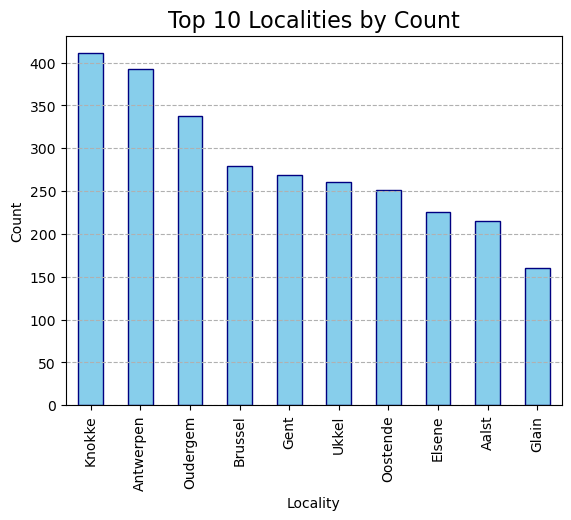

In [97]:
Top_localities= Data.groupby("Locality").size().sort_values(ascending=False).head(10)
Top_localities.plot(kind='bar', color='skyblue', edgecolor="navy")
###or index, value in enumerate(Top_localities):
   #### plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Localities by Count', fontsize=16)
plt.xlabel('Locality')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=1)
Top_localities

### Avg price per Locality

In [27]:
Data.groupby(["Locality","Type"])["Price"].mean().sort_values(ascending=False).head(10).astype(int).apply(lambda x: f'{x:,.0f}')

Locality             Type     
Lendelede            House        375,223,400
Barchon              House          7,823,850
Ans                  Apartment      5,400,000
Afsnee               Other          4,423,333
Arsimont             House          4,126,950
Deurle               Other          3,850,000
Gontrode             Other          3,113,366
Waasmunster          Other          3,000,000
Sint-Joost-ten-Node  House          2,637,500
Beerse               Other          2,450,000
Name: Price, dtype: object

### Avg Araea per Locality

In [47]:
filtered_data = Data[(Data["Type"] == "House") | (Data["Type"] == "Apartment")]
result = filtered_data.groupby(["Locality", "Type"])["Living_Area"].mean().sort_values(ascending=False).head(10).astype(int)
result

Locality               Type     
Sint-Joost-ten-Node    House        1681
Bergilers              Apartment    1363
Amblève                House         927
Vosselaar              House         739
Corbion                House         737
Amblève                Apartment     721
Houtave                House         719
Bellevaux-Ligneuville  House         681
Mont                   House         670
Baardegem              Apartment     640
Name: Living_Area, dtype: int64

### Percentege Furnasherd

In [51]:
filtered_data = Data[(Data["Type"] == "House") | (Data["Type"] == "Apartment")]
filtered_data.groupby("Is_Furnished").Id.count()

Is_Furnished
False    11036
True       341
Name: Id, dtype: int64